In [15]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.preprocessing import LabelEncoder


In [16]:
data=pd.read_csv("train.csv", header=0, index_col=0)

In [3]:
data.describe()

,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,1.142370e+05,...,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,1.883046e+00,...,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,1.393979e+00,...,1.356294e+00,1.795978e+00,2.604704,2.099407e+00,5.031683e-01,1.625988e+00,1.074232e+00,0.693262,1.264497e+00,1.134702e+00
min,0.000000,-9.996497e-07,-9.817614e-07,-6.475929e-07,-5.287068e-07,-9.055091e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,-9.875317e-07,...,-9.820642e-07,-9.978497e-07,0.019139,-9.994953e-07,-9.564174e-07,-9.223798e-07,8.197812e-07,0.000000,-9.901257e-07,-9.999134e-07
25%,1.000000,9.135798e-01,5.316428e+00,3.487398e+00,7.605918e+00,2.065064e+00,2.101477e+00,8.658986e-02,7.853659e+00,1.050328e+00,...,1.786965e+00,5.647712e+00,1.963315,2.053777e-02,1.417600e+00,2.101900e+00,1.393830e+00,0.000000,1.106172e+00,1.012658e+00
50%,1.000000,1.469550e+00,7.023803e+00,4.205991e+00,8.670867e+00,2.412790e+00,2.452166e+00,3.860317e-01,9.059582e+00,1.312910e+00,...,2.436195e+00,6.749117e+00,2.739239,1.398639e-01,1.614802e+00,2.963620e+00,1.798436e+00,0.000000,1.560138e+00,1.589403e+00
75%,1.000000,2.136128e+00,9.465497e+00,4.833250e+00,9.771353e+00,2.775285e+00,2.834285e+00,1.625246e+00,1.023256e+01,2.100657e+00,...,3.379175e+00,7.911392e+00,4.075361,8.718333e-01,1.843886e+00,4.108146e+00,2.390158e+00,0.000000,2.332425e+00,2.261905e+00
max,1.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,1.853392e+01,...,2.000000e+01,2.000000e+01,19.686069,2.000000e+01,1.563161e+01,2.000000e+01,2.000000e+01,11.000000,2.000000e+01,2.000000e+01


In [4]:
data.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
ID,,,,,,,,,,,,,,,,,,,,,
3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [6]:
#all variables
variables= ['v1','v2','v3','v4','v5','v6','v7','v8', 'v9', 'v10']
variables+=['v11','v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19','v20']
variables+=['v21','v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29','v30']
variables+=['v31','v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39','v40']
variables+=['v41','v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49','v50']
variables+=['v51','v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59','v60']
variables+=['v61','v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v69','v70']
variables+=['v71','v72', 'v73', 'v74', 'v75', 'v76', 'v77', 'v78', 'v79','v80']
variables+=['v81','v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89','v90']
variables+=['v91','v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99','v100']
variables+=['v101','v102', 'v103', 'v104', 'v105', 'v106', 'v107', 'v108', 'v109','v110']
variables+=['v111','v112', 'v113', 'v114', 'v115', 'v116', 'v117', 'v118', 'v119','v120']
variables+=['v121','v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129','v130' , 'v131']
len(variables)

131

In [5]:
#categorical variables
var_cat=['v3' , 'v22' ,'v24', 'v30', 'v31' , 'v47' , 'v52' , 'v56','v66' , 'v71' , 'v74' , 'v75' , 'v79', 'v91', 'v107' , 'v110'] 
var_cat= var_cat +  ['v112', 'v113', 'v125']
var_cat;

In [8]:
# numerical variables
var_num= []
for v in variables:
    if v not in var_cat:
        var_num.append(v)

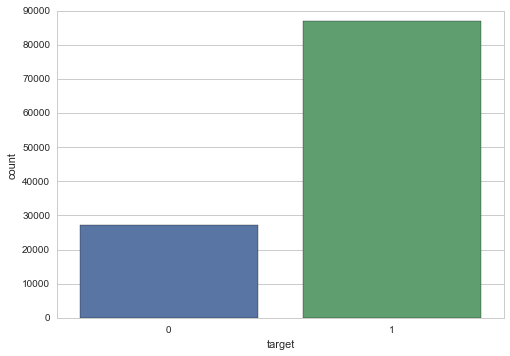

In [7]:
sns.set_style('whitegrid')
# most of the claims were suitable for an accelerated approval
sns.countplot(x="target", data=data)

In [17]:
#fill NaN categoricalvariables with 0 and apply label encoding
le=LabelEncoder()
for v in var_cat:
    data[v].fillna(0, inplace=True)
    data[v]=le.fit_transform(np.array(data[v]))

In [18]:
data[:]=data[:].fillna(data[:].mean(), inplace=True)

C:\Anaconda2\lib\site-packages\pandas\core\generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
data

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
ID,,,,,,,,,,,,,,,,,,,,,
3,1,1.335739e+00,8.727474,3,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,8.000000,1.989780,3.575369e-02,22,1.804126,3.113719,2.024285,0,0.636365,2.857144e+00
4,1,1.630686e+00,7.464411,3,4.145098,9.191265,2.436402,2.483921,2.301630,9.031859,...,6.822439,3.549938,5.988956e-01,7,1.672658,3.239542,1.957825,0,1.925763,1.739389e+00
5,1,9.438769e-01,5.310079,3,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,9.333333,2.477596,1.345191e-02,6,1.773709,3.922193,1.120468,2,0.883118,1.176472e+00
6,1,7.974146e-01,8.304757,3,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,7.018256,1.812795,2.267384e-03,65,1.415230,2.954381,1.990847,1,1.677108,1.034483e+00
8,1,1.630686e+00,7.464411,3,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,...,6.822439,3.549938,9.198120e-01,90,1.672658,3.239542,2.030373,0,1.925763,1.739389e+00
9,0,1.630686e+00,7.464411,3,4.145098,8.856791,2.436402,2.483921,0.359993,9.031859,...,6.822439,3.549938,4.986116e-02,88,1.672658,3.239542,1.536222,0,1.925763,1.739389e+00
12,0,8.998057e-01,7.312995,3,3.494148,9.946200,1.926070,1.770427,0.066251,5.011287,...,3.476299,1.992594,8.375832e-02,38,3.276100,1.623298,2.266575,0,2.263736,9.708730e-01
21,1,1.630686e+00,7.464411,3,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,...,6.822439,3.549938,9.198120e-01,53,1.672658,3.239542,2.030373,0,1.925763,1.739389e+00
22,0,2.078651e+00,8.462619,0,3.739030,5.265636,1.573033,2.303371,0.015869,11.111111,...,8.148148,1.875560,1.865950e-02,83,1.159637,5.582865,1.105283,0,1.170731,3.333334e+00


In [20]:
#from sklearn.decomposition import PCA
#pca = PCA()
#X = pca.fit_transform(data[variables])

In [25]:
#Logistic Regression
logreg = LogisticRegression()

logreg.fit(data[variables], data['target'])

logreg.score(data[variables], data['target'])

0.76616719587827253

In [26]:
# get Coefficient of Determination(R^2) for each feature using Logistic Regression
coeff_df = DataFrame(data.columns.delete([0]))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = (pd.Series(logreg.coef_[0])) ** 2

# preview
coeff_df.head()

,Features,Coefficient Estimate
0,v1,0.000197
1,v2,0.000007
2,v3,0.002374
3,v4,0.000070
4,v5,0.000058


[(116, 131)]

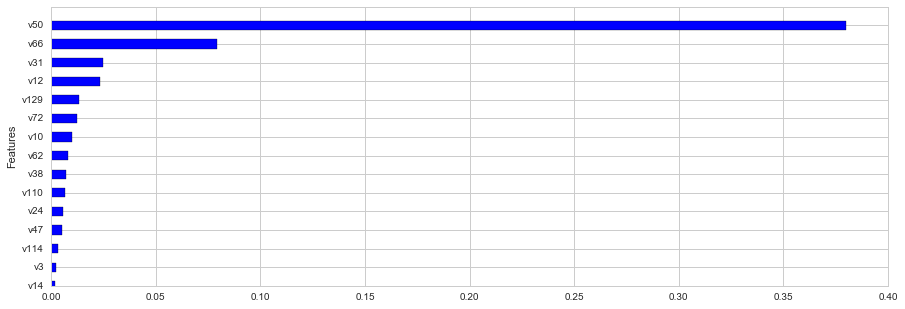

In [28]:
coeff_ser = Series(list(coeff_df["Coefficient Estimate"]), index=coeff_df["Features"]).sort_values()
fig = coeff_ser.plot(kind='barh', figsize=(15,5))
fig.set(ylim=(116, 131))

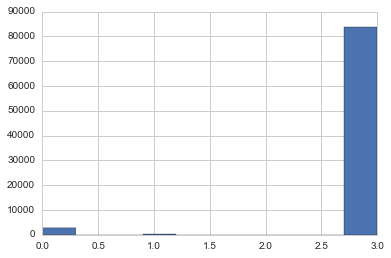

In [29]:
# this shows that on variable 3 i.e. v3, being category-A makes a claim more likely to be expedited
plt.hist(data['v3'].loc[data['target']==1])
plt.show()

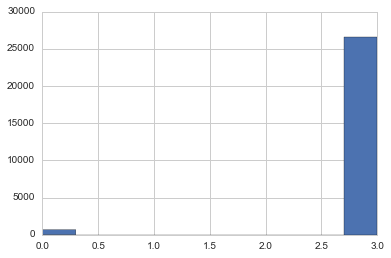

In [30]:
plt.hist(data['v3'].loc[data['target']==0])
plt.show()

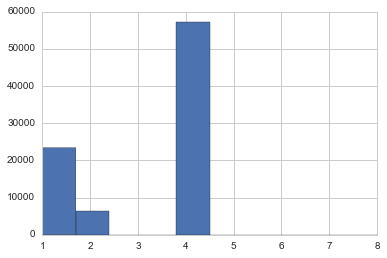

In [58]:
plt.hist(data['v71'].loc[data['target']==1])
plt.show()

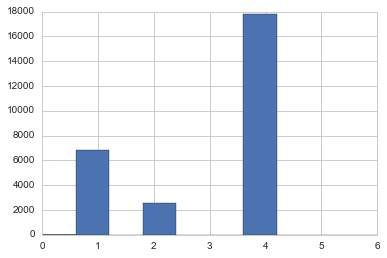

In [59]:
#on variable 71, "missing data" makes a claim much less likely to be expedited.
plt.hist(data['v71'].loc[data['target']==0])
plt.show()

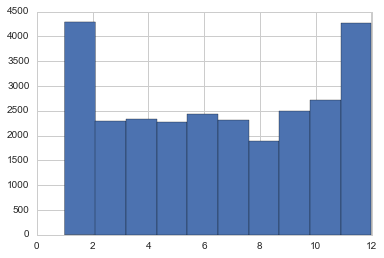

In [60]:
plt.hist(data['v52'].loc[data['target']==0])
plt.show()

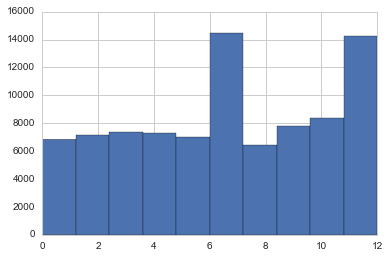

In [62]:
#on v52, having "missing data" will lead pretty strongly to an expedited claim.
plt.hist(data['v52'].loc[data['target']==1])
plt.show()

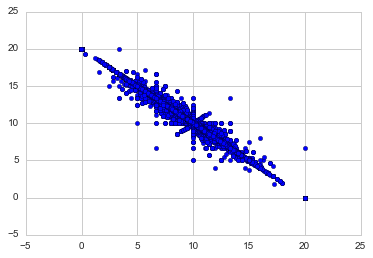

In [33]:
plt.scatter(data['v69'],data['v115'] )
plt.show()

In [32]:
np.corrcoef(data['v69'], data['v115']) # these two are interrelated. drop any of these two => drop v115

array([[ 1.        , -0.99369105],
       [-0.99369105,  1.        ]])

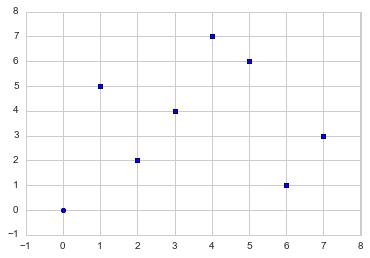

In [34]:
plt.scatter(data['v91'] , data['v107']) # drop any of these two => drop v107
plt.show()

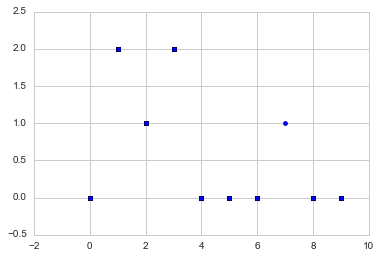

In [35]:
plt.scatter(data['v47'] , data['v110'])  # drop any of these two => drop v110
plt.show()

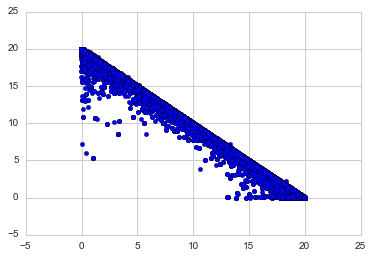

In [36]:
plt.scatter(data['v58'] , data['v100'])  
plt.show()

In [39]:
np.corrcoef(data['v58'], data['v100']) # these two are also correlated. drop v58

array([[ 1.        , -0.99766507],
       [-0.99766507,  1.        ]])

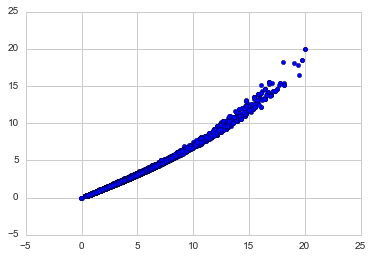

In [41]:
plt.scatter(data['v17'] , data['v76'])  
plt.show()

In [42]:
np.corrcoef(data['v17'], data['v76']) # drop v17

array([[ 1.        ,  0.99267126],
       [ 0.99267126,  1.        ]])

In [43]:
var_drop=['v17', 'v58', 'v110' , 'v107', 'v115']

In [54]:
# variables-'v4'   not supported

In [49]:
new_variables = variables
#for v in variables:
#    if not in var_drop:
        

In [50]:
new_variable= filter(lambda v: v not in var_drop , new_variables)

In [52]:
len(new_variable)

126

In [53]:
clf = tree.DecisionTreeClassifier()
clf.fit(data[new_variable], data['target'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [55]:
test_data=pd.read_csv("test.csv")

#preprocess
le1=LabelEncoder()
for v in var_cat:
    test_data[v].fillna(0, inplace=True)
    test_data[v]=le1.fit_transform(np.array(test_data[v]))

test_data[:]=test_data.fillna(test_data[:].mean(), inplace=True)

In [56]:
pred_out=clf.predict(test_data[new_variable])

In [57]:
# submission    
submission = pd.DataFrame()
submission["ID"]            = test_data["ID"]
submission["PredictedProb"] = pred_out

submission.to_csv('sample_submission.csv', index=False)